In [9]:
import pandas as pd
from gensim.models import Word2Vec

import sys
sys.path.append("..")

In [10]:
df = pd.read_csv("../data/raw/recipes_by_ingredients.csv", index_col = 0)
df

,achiote paste,achiote powder,acini di pepe,acorn squash,active dry yeast,adobo sauce,adobo seasoning,adzuki beans,agave nectar,agave tequila,...,yellow rock sugar,yellow squash,yellow summer squash,yellow tomato,yellowfin tuna,yogurt cheese,yucca root,yukon gold potatoes,yuzu juice,zucchini blossoms
label,,,,,,,,,,,,,,,,,,,,,
Infineon Raceway Baked Beans,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sour Cream Noodle Bake,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Middle-Eastern Eggplant Rounds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Saffron Jewel Rice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thai Sweet and Sour Wings,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spicy Agave Wave,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Apple Chimichangas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Summer Corn Salad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
recipes = (
    df
    .astype(bool)
    .apply(lambda row: row.index[row].tolist(), axis=1)
    .tolist()
)
recipes

[['applewood smoked bacon',
  'cannellini beans',
  'cider vinegar',
  'cracked black pepper',
  'dark brown sugar',
  'kidney beans',
  'kosher salt',
  'lima beans',
  'minced garlic',
  'skirt steak',
  'soy sauce'],
 ['cottage cheese',
  'egg noodles',
  'ground black pepper',
  'ground chuck',
  'red pepper flakes',
  'sliced green onions',
  'sour cream',
  'tomato sauce'],
 ['extra-virgin olive oil',
  'grape tomatoes',
  'grated lemon zest',
  'parsley leaves',
  'roasted garlic'],
 ['basmati rice',
  'blanched almonds',
  'dried cranberries',
  'fresh parsley',
  'green cardamom pods',
  'ground allspice',
  'ground cumin',
  'orange zest',
  'saffron threads',
  'unsalted butter'],
 ['black pepper',
  'chicken wings',
  'fish sauce',
  'fresh ginger',
  'garlic powder',
  'rice vinegar',
  'sweet chili sauce'],
 ['balsamic vinegar',
  'chopped leaves',
  'cremini mushrooms',
  'fresh parsley',
  'ground black pepper',
  'olive oil',
  'panko breadcrumbs',
  'sour cream',
  'u

In [5]:
def train_word2vec(
    recipes,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4,
    epochs=20,
    sg=1
):
    """
    Train Word2Vec on recipe ingredient lists.
    """
    model = Word2Vec(
        sentences=recipes,
        vector_size=vector_size,
        window=window,
        min_count=min_count,
        workers=workers,
        sg=sg,  # 1 = skip-gram (better for small datasets)
        compute_loss=True
    )

    model.train(recipes, total_examples=len(recipes), epochs=epochs)
    return model

In [6]:
model = train_word2vec(recipes)

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


In [7]:
model.wv.most_similar("fresh cilantro", topn=10)

[('cilantro sprigs', 0.6476753950119019),
 ('ear of corn', 0.6115098595619202),
 ('chopped cilantro', 0.6044094562530518),
 ('fresh coriander', 0.6040734648704529),
 ('adobo seasoning', 0.5763241648674011),
 ('baby lima beans', 0.5709177851676941),
 ('white corn tortillas', 0.566771388053894),
 ('cilantro leaves', 0.5651042461395264),
 ('grated cotija', 0.5613306760787964),
 ('pickled jalapeno peppers', 0.5542328953742981)]

In [14]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [15]:
x_vals, y_vals, labels = reduce_dimensions(model)

In [ ]:
def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, 
                       y=y_vals, 
                       mode='text', 
                       text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')

In [21]:
plot_with_plotly(x_vals, y_vals, labels)

In [18]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

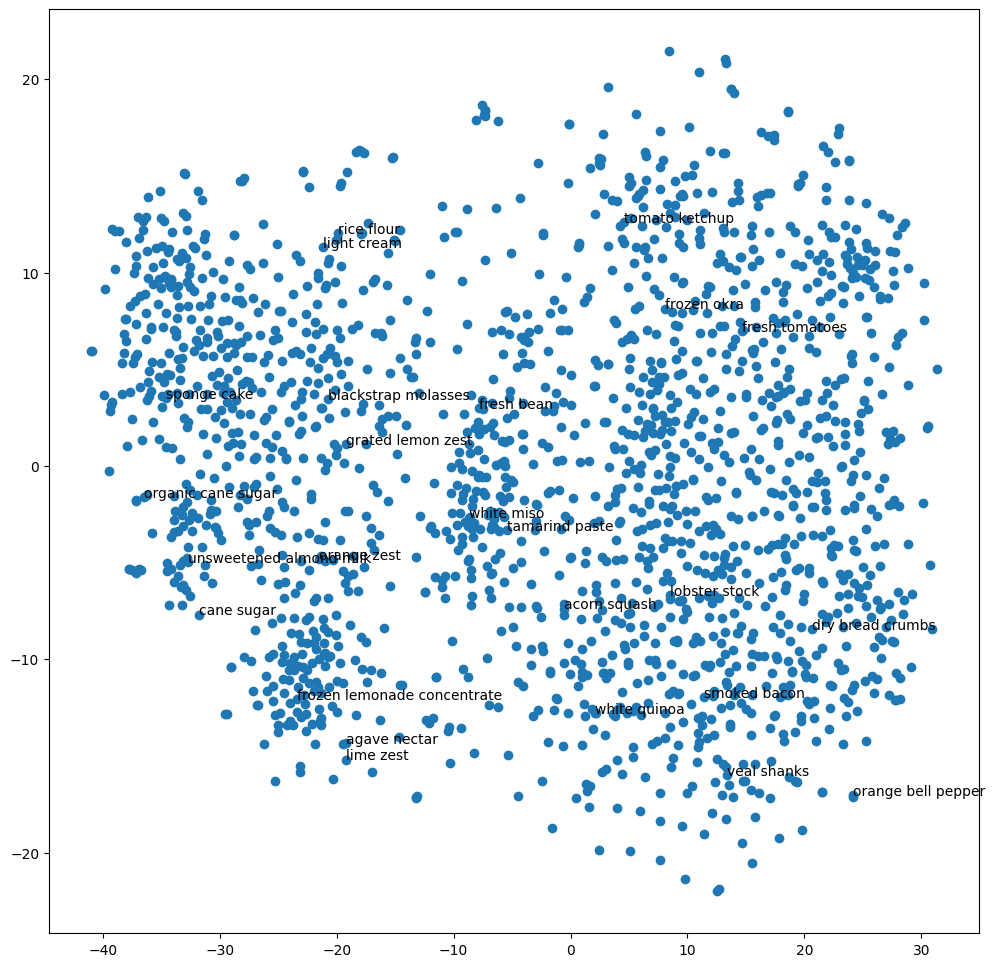

In [19]:
plot_with_matplotlib(x_vals, y_vals, labels)

In [12]:
import tempfile

with tempfile.NamedTemporaryFile(prefix='gensim-model-', delete=False) as tmp:
    temporary_filepath = tmp.name
    model.save(temporary_filepath)
    new_model = Word2Vec.load(temporary_filepath)

In [13]:
model.save('w2v.pkl')

In [14]:
new_model = Word2Vec.load('w2v.pkl')

In [15]:
new_model.wv.most_similar('fresh cilantro')

[('cilantro sprigs', 0.6476753950119019),
 ('ear of corn', 0.6115098595619202),
 ('chopped cilantro', 0.6044094562530518),
 ('fresh coriander', 0.6040734648704529),
 ('adobo seasoning', 0.5763241648674011),
 ('baby lima beans', 0.5709177851676941),
 ('white corn tortillas', 0.566771388053894),
 ('cilantro leaves', 0.5651042461395264),
 ('grated cotija', 0.5613306760787964),
 ('pickled jalapeno peppers', 0.5542328953742981)]